In [7]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

pd.set_option('display.float_format', lambda x: '{:.2f}'.format(x))
np.set_printoptions(suppress = True)

In [8]:
df_customers = pd.read_csv("dataset/customers.csv")
df_loans = pd.read_csv("dataset/loans.csv")
df_bureau = pd.read_csv("dataset/bureau_data.csv")

In [9]:
df_customers.shape, df_loans.shape, df_bureau.shape

((50000, 12), (50000, 15), (50000, 8))

Merge the columns

In [10]:
#Merge customer and loan data
df = pd.merge(df_customers, df_loans, on = 'cust_id')
df.head(3)

,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,...,loan_amount,processing_fee,gst,net_disbursement,loan_tenure_months,principal_outstanding,bank_balance_at_application,disbursal_date,installment_start_dt,default
0,C00001,44,M,Married,Self-Employed,2586000,3,Owned,27,Delhi,...,2467000,49340.00,444060,1973600,33,1630408,873386,2019-07-24,2019-08-10,False
1,C00002,38,M,Married,Salaried,1206000,3,Owned,4,Chennai,...,3883000,77660.00,698940,3106400,30,709309,464100,2019-07-24,2019-08-15,False
2,C00003,46,F,Married,Self-Employed,2878000,3,Owned,24,Kolkata,...,2170000,43400.00,390600,1736000,21,1562399,1476042,2019-07-24,2019-08-21,False


In [11]:
#merge bureau dataset
df = pd.merge(df, df_bureau)
df.head(3)

,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,...,disbursal_date,installment_start_dt,default,number_of_open_accounts,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio
0,C00001,44,M,Married,Self-Employed,2586000,3,Owned,27,Delhi,...,2019-07-24,2019-08-10,False,1,1,42,0,0,3,7
1,C00002,38,M,Married,Salaried,1206000,3,Owned,4,Chennai,...,2019-07-24,2019-08-15,False,3,1,96,12,60,5,4
2,C00003,46,F,Married,Self-Employed,2878000,3,Owned,24,Kolkata,...,2019-07-24,2019-08-21,False,2,1,82,24,147,6,58


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 33 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   cust_id                      50000 non-null  object 
 1   age                          50000 non-null  int64  
 2   gender                       50000 non-null  object 
 3   marital_status               50000 non-null  object 
 4   employment_status            50000 non-null  object 
 5   income                       50000 non-null  int64  
 6   number_of_dependants         50000 non-null  int64  
 7   residence_type               49938 non-null  object 
 8   years_at_current_address     50000 non-null  int64  
 9   city                         50000 non-null  object 
 10  state                        50000 non-null  object 
 11  zipcode                      50000 non-null  int64  
 12  loan_id                      50000 non-null  object 
 13  loan_purpose    

In [13]:
#As target column 'default' is boolean we convert it into integer
df['default'] = df['default'].astype(int)
df.default.value_counts()

default
0    45703
1     4297
Name: count, dtype: int64

### Data Leakage – Test Train Contamination

**Splitting the data to avoid Data Leakage – Test Train Contamination**


In [14]:
X = df.drop("default", axis = "columns")
y = df['default']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.25, random_state = 42)

df_train = pd.concat([X_train, y_train], axis = 'columns')
df_test = pd.concat([X_test, y_test], axis = 'columns')

df_train.head()

,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,...,disbursal_date,installment_start_dt,number_of_open_accounts,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio,default
12746,C12747,59,M,Married,Self-Employed,11327000,3,Owned,30,Hyderabad,...,2020-10-31,2020-11-11,4,2,152,20,118,4,36,0
32495,C32496,44,F,Single,Salaried,715000,0,Owned,27,Mumbai,...,2022-10-22,2022-10-27,3,1,160,10,62,5,5,0
43675,C43676,38,M,Single,Salaried,3195000,0,Mortgage,26,Chennai,...,2023-12-04,2023-12-29,1,1,54,12,67,4,0,0
9040,C09041,42,M,Married,Salaried,1500000,2,Mortgage,30,Bangalore,...,2020-06-18,2020-07-07,3,0,76,0,0,8,87,0
13077,C13078,58,M,Married,Self-Employed,1817000,4,Owned,29,Pune,...,2020-11-12,2020-12-07,1,2,60,0,0,1,71,0


In [15]:
df_train.shape, df_test.shape

((37500, 33), (12500, 33))

In [16]:
df_train.isna().sum()

cust_id                         0
age                             0
gender                          0
marital_status                  0
employment_status               0
income                          0
number_of_dependants            0
residence_type                 47
years_at_current_address        0
city                            0
state                           0
zipcode                         0
loan_id                         0
loan_purpose                    0
loan_type                       0
sanction_amount                 0
loan_amount                     0
processing_fee                  0
gst                             0
net_disbursement                0
loan_tenure_months              0
principal_outstanding           0
bank_balance_at_application     0
disbursal_date                  0
installment_start_dt            0
number_of_open_accounts         0
number_of_closed_accounts       0
total_loan_months               0
delinquent_months               0
total_dpd     

In [17]:
#handling the null value found in residence_type
df_train.residence_type.unique()

array(['Owned', 'Mortgage', 'Rented', nan], dtype=object)

In [18]:
#As residence_type is a categorical value we use mode
#find the mode of residence type for train dataset
mode_residence = df_train.residence_type.mode()[0]
mode_residence

'Owned'

In [19]:
#replace the null with mode values for training dataset
df_train.residence_type.fillna(mode_residence, inplace = True)
df_train.residence_type.unique()

C:\Users\Sandeep\AppData\Local\Temp\ipykernel_21104\4042947126.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train.residence_type.fillna(mode_residence, inplace = True)


array(['Owned', 'Mortgage', 'Rented'], dtype=object)

In [20]:
#replace the null value from test dataset
df_test.residence_type.fillna(mode_residence, inplace = True)
df_test.residence_type.unique()

C:\Users\Sandeep\AppData\Local\Temp\ipykernel_21104\3452501179.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_test.residence_type.fillna(mode_residence, inplace = True)


array(['Owned', 'Mortgage', 'Rented'], dtype=object)

In [21]:
df_train.duplicated().sum()

0

In [22]:
df_train.columns

Index(['cust_id', 'age', 'gender', 'marital_status', 'employment_status',
       'income', 'number_of_dependants', 'residence_type',
       'years_at_current_address', 'city', 'state', 'zipcode', 'loan_id',
       'loan_purpose', 'loan_type', 'sanction_amount', 'loan_amount',
       'processing_fee', 'gst', 'net_disbursement', 'loan_tenure_months',
       'principal_outstanding', 'bank_balance_at_application',
       'disbursal_date', 'installment_start_dt', 'number_of_open_accounts',
       'number_of_closed_accounts', 'total_loan_months', 'delinquent_months',
       'total_dpd', 'enquiry_count', 'credit_utilization_ratio', 'default'],
      dtype='object')

In [23]:
#split the columns into continious and categorical
columns_continuous = ['age', 'income', 'number_of_dependants', 'years_at_current_address',
                      'sanction_amount', 'loan_amount','processing_fee', 'gst', 'net_disbursement', 
                      'loan_tenure_months','principal_outstanding', 'bank_balance_at_application', 
                      'number_of_open_accounts','number_of_closed_accounts', 'total_loan_months', 
                      'delinquent_months','total_dpd', 'enquiry_count', 'credit_utilization_ratio' ]
columns_categorical = ['gender', 'marital_status', 'employment_status', 'residence_type', 
                       'city', 'state', 'zipcode', 'loan_purpose', 'loan_type', 'default']

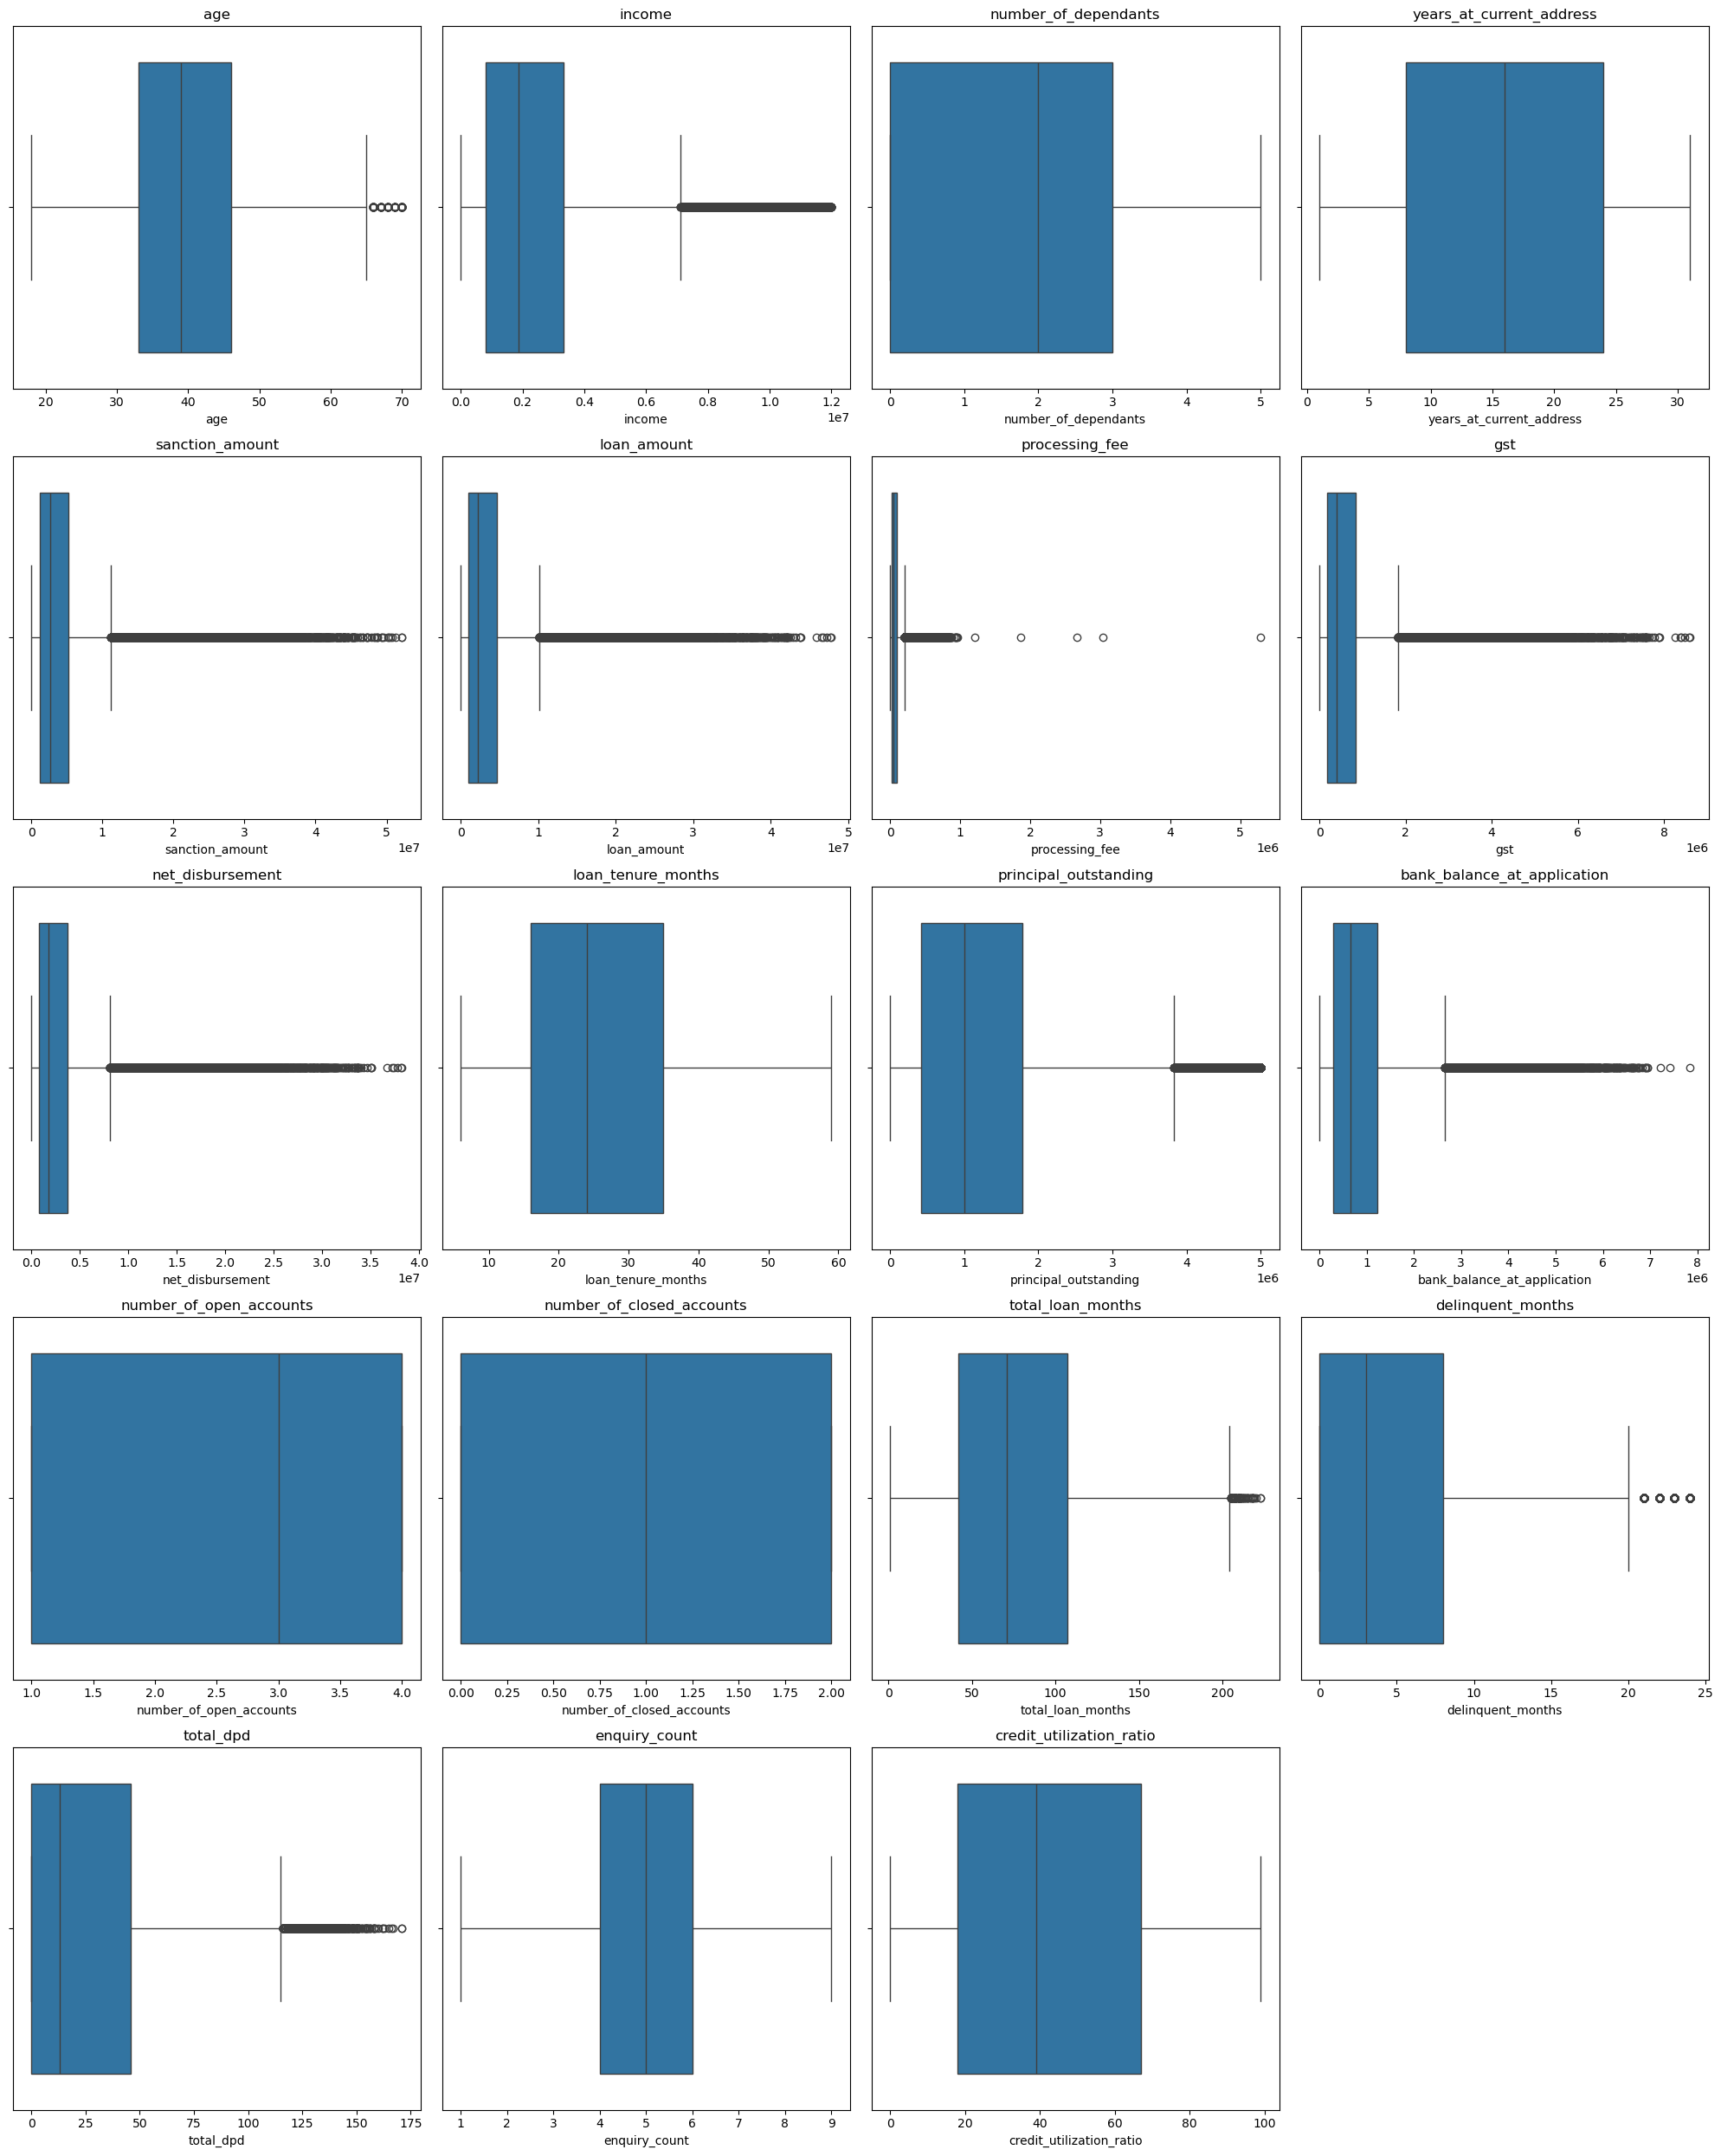

In [24]:
num_plots = len(columns_continuous)
num_cols = 4 #number of plots per row
num_rows = (num_plots + num_cols - 1) // num_cols #calculate the number of rows needed

fig, axes = plt.subplots(num_rows, num_cols, figsize=(5 * num_cols, 5 * num_rows))#Adjust the figure
axes = axes.flatten() #flatten the axes array for easier indexing

for i, col in enumerate(columns_continuous):
    sns.boxplot(x=df_train[col], ax = axes[i])
    axes[i].set_title(col) #set the title to the name of the variable

#If there are any empty plots (if the number of plots isn't a perfect multiple of num_cols). hide the
for j in range(i + 1, num_rows * num_cols):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

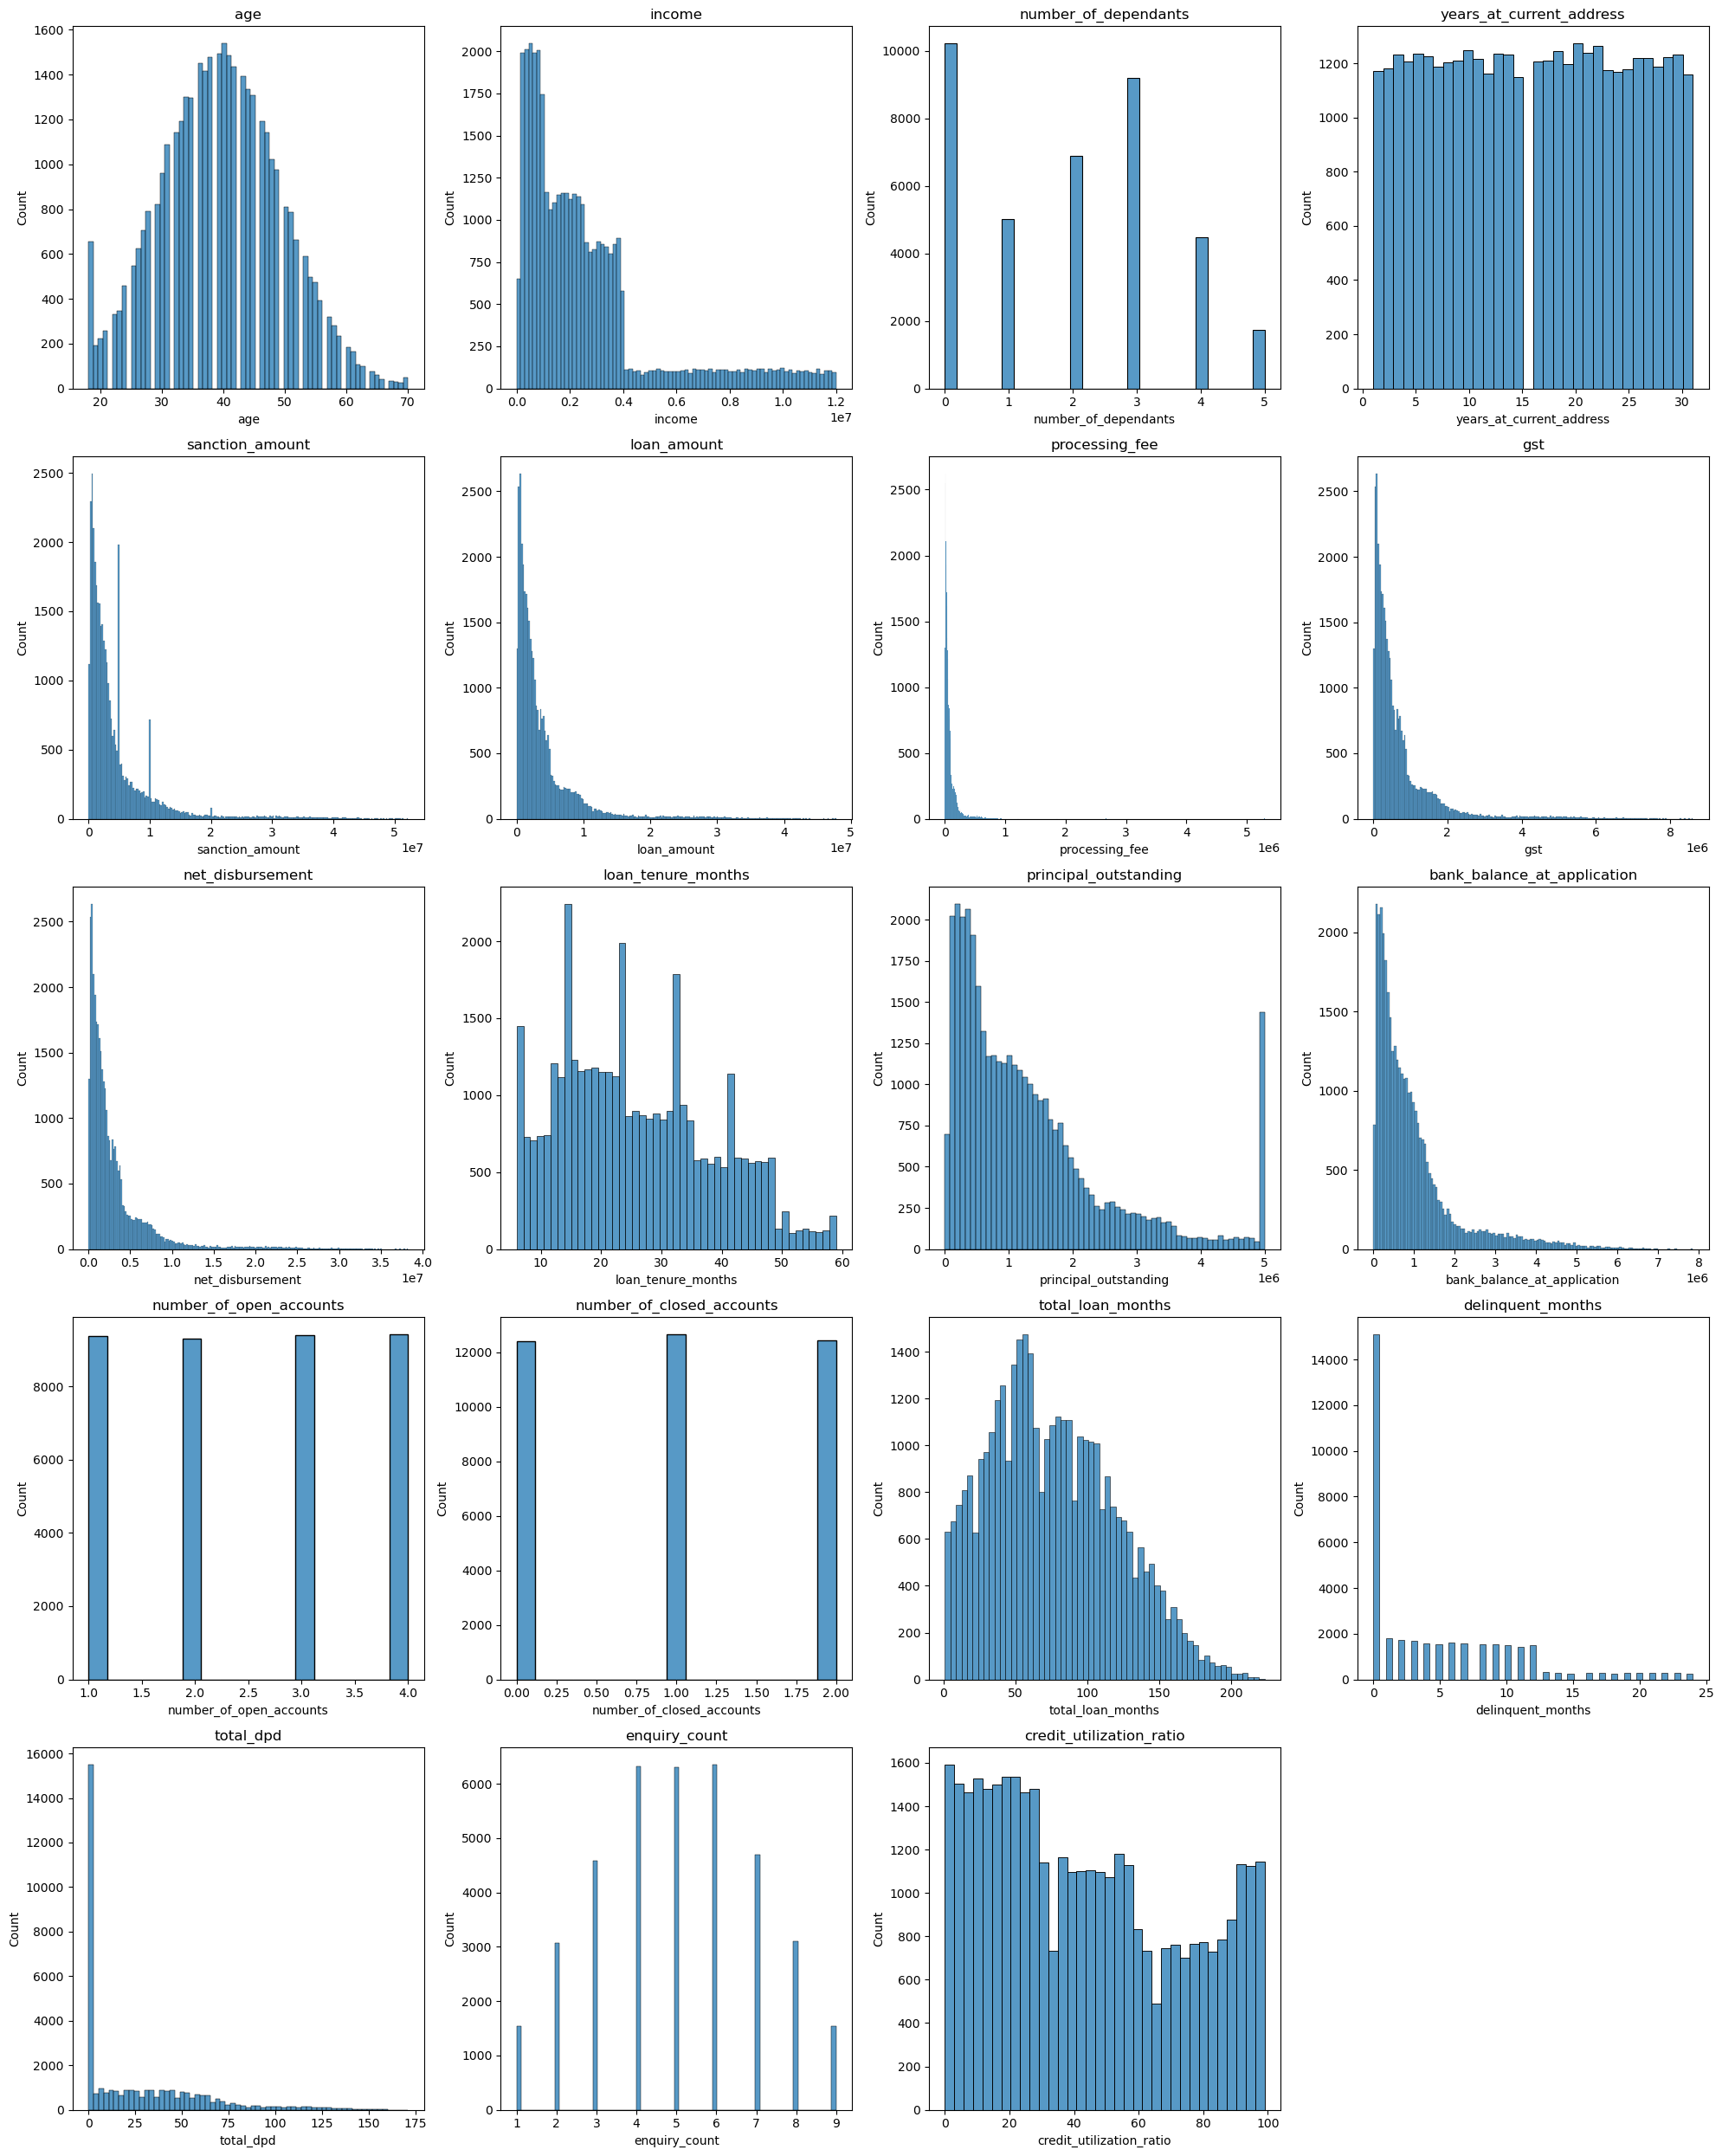

In [25]:
num_plots = len(columns_continuous)
num_cols = 4 #number of plots per row
num_rows = (num_plots + num_cols - 1) // num_cols #calculate the number of rows needed

fig, axes = plt.subplots(num_rows, num_cols, figsize=(5 * num_cols, 5 * num_rows))#Adjust the figure
axes = axes.flatten() #flatten the axes array for easier indexing

for i, col in enumerate(columns_continuous):
    sns.histplot(x=df_train[col], ax = axes[i])
    axes[i].set_title(col) #set the title to the name of the variable

#If there are any empty plots (if the number of plots isn't a perfect multiple of num_cols). hide the
for j in range(i + 1, num_rows * num_cols):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

In [26]:
#investigating processing fee for outliers
df_train.processing_fee.describe()

count     37500.00
mean      80290.68
std      113128.14
min           0.00
25%       19220.00
50%       44600.00
75%       92420.00
max     5293543.52
Name: processing_fee, dtype: float64

In [27]:
#As processing fee is usually 3% we try to find record where processing fee is more than 3%
df_train[(df_train.processing_fee/df_train.loan_amount) > 0.03][["loan_amount", "processing_fee"]]

,loan_amount,processing_fee
23981,2234000,2669791.02
28174,966000,1214492.67
47089,1738000,1858964.77
29305,2616000,3036378.01
9898,3626000,5293543.52


In [28]:
#As there are only 5 such records we will ignore those records and create a new copy
df_train_1 = df_train[(df_train.processing_fee/df_train.loan_amount) < 0.03].copy()
df_train_1[(df_train_1.processing_fee/df_train_1.loan_amount) > 0.03][["loan_amount", "processing_fee"]]

,loan_amount,processing_fee


In [29]:
#replicating on test set
df_test_1 = df_test[(df_test.processing_fee/df_test.loan_amount) < 0.03].copy()
df_test_1[(df_test_1.processing_fee/df_test_1.loan_amount) > 0.03][["loan_amount", "processing_fee"]]

,loan_amount,processing_fee


In [30]:
columns_categorical

['gender',
 'marital_status',
 'employment_status',
 'residence_type',
 'city',
 'state',
 'zipcode',
 'loan_purpose',
 'loan_type',
 'default']

In [31]:
#print the unique values in categorical column to find the outliers
for col in columns_categorical:
    print(col, "--->>", df_train_1[col].unique())

gender --->> ['M' 'F']
marital_status --->> ['Married' 'Single']
employment_status --->> ['Self-Employed' 'Salaried']
residence_type --->> ['Owned' 'Mortgage' 'Rented']
city --->> ['Hyderabad' 'Mumbai' 'Chennai' 'Bangalore' 'Pune' 'Kolkata' 'Ahmedabad'
 'Delhi' 'Lucknow' 'Jaipur']
state --->> ['Telangana' 'Maharashtra' 'Tamil Nadu' 'Karnataka' 'West Bengal'
 'Gujarat' 'Delhi' 'Uttar Pradesh' 'Rajasthan']
zipcode --->> [500001 400001 600001 560001 411001 700001 380001 110001 226001 302001]
loan_purpose --->> ['Home' 'Education' 'Personal' 'Auto' 'Personaal']
loan_type --->> ['Secured' 'Unsecured']
default --->> [0 1]


In [32]:
#loan purpose has 'Personal' and 'Personaal' that needs to be treated
df_train_1['loan_purpose'] = df_train_1['loan_purpose'].replace('Personaal', 'Personal')
df_test_1['loan_purpose'] = df_test_1['loan_purpose'].replace('Personaal', 'Personal')
df_train_1.loan_purpose.unique()
df_test_1.loan_purpose.unique()

array(['Home', 'Education', 'Auto', 'Personal'], dtype=object)

<h3 aligns="centre" styles="color:blue"> Exploratory Data Analysis</h3>

In [33]:
columns_continuous

['age',
 'income',
 'number_of_dependants',
 'years_at_current_address',
 'sanction_amount',
 'loan_amount',
 'processing_fee',
 'gst',
 'net_disbursement',
 'loan_tenure_months',
 'principal_outstanding',
 'bank_balance_at_application',
 'number_of_open_accounts',
 'number_of_closed_accounts',
 'total_loan_months',
 'delinquent_months',
 'total_dpd',
 'enquiry_count',
 'credit_utilization_ratio']

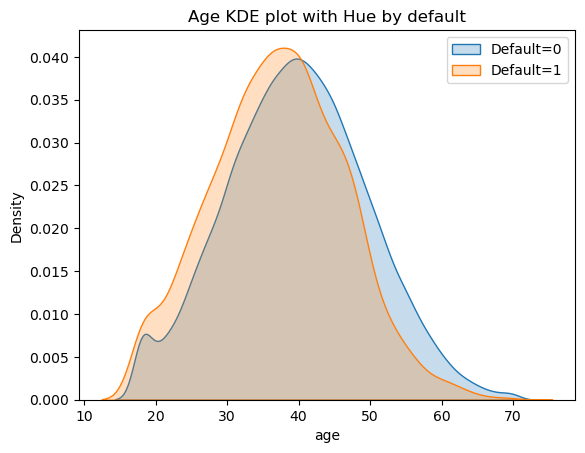

In [34]:
#age for the people who have defaulted vs age of people who have defaulted
sns.kdeplot(df_train_1[df_train_1.default == 0]['age'], fill = True, label = "Default=0")
sns.kdeplot(df_train_1[df_train_1.default == 1]['age'], fill = True, label = "Default=1")
plt.title(f"Age KDE plot with Hue by default")
plt.legend()
plt.show()

Insights
1. Orange graph is inclined towards the left side of blue chart which indicates people with young age are most likely to default 

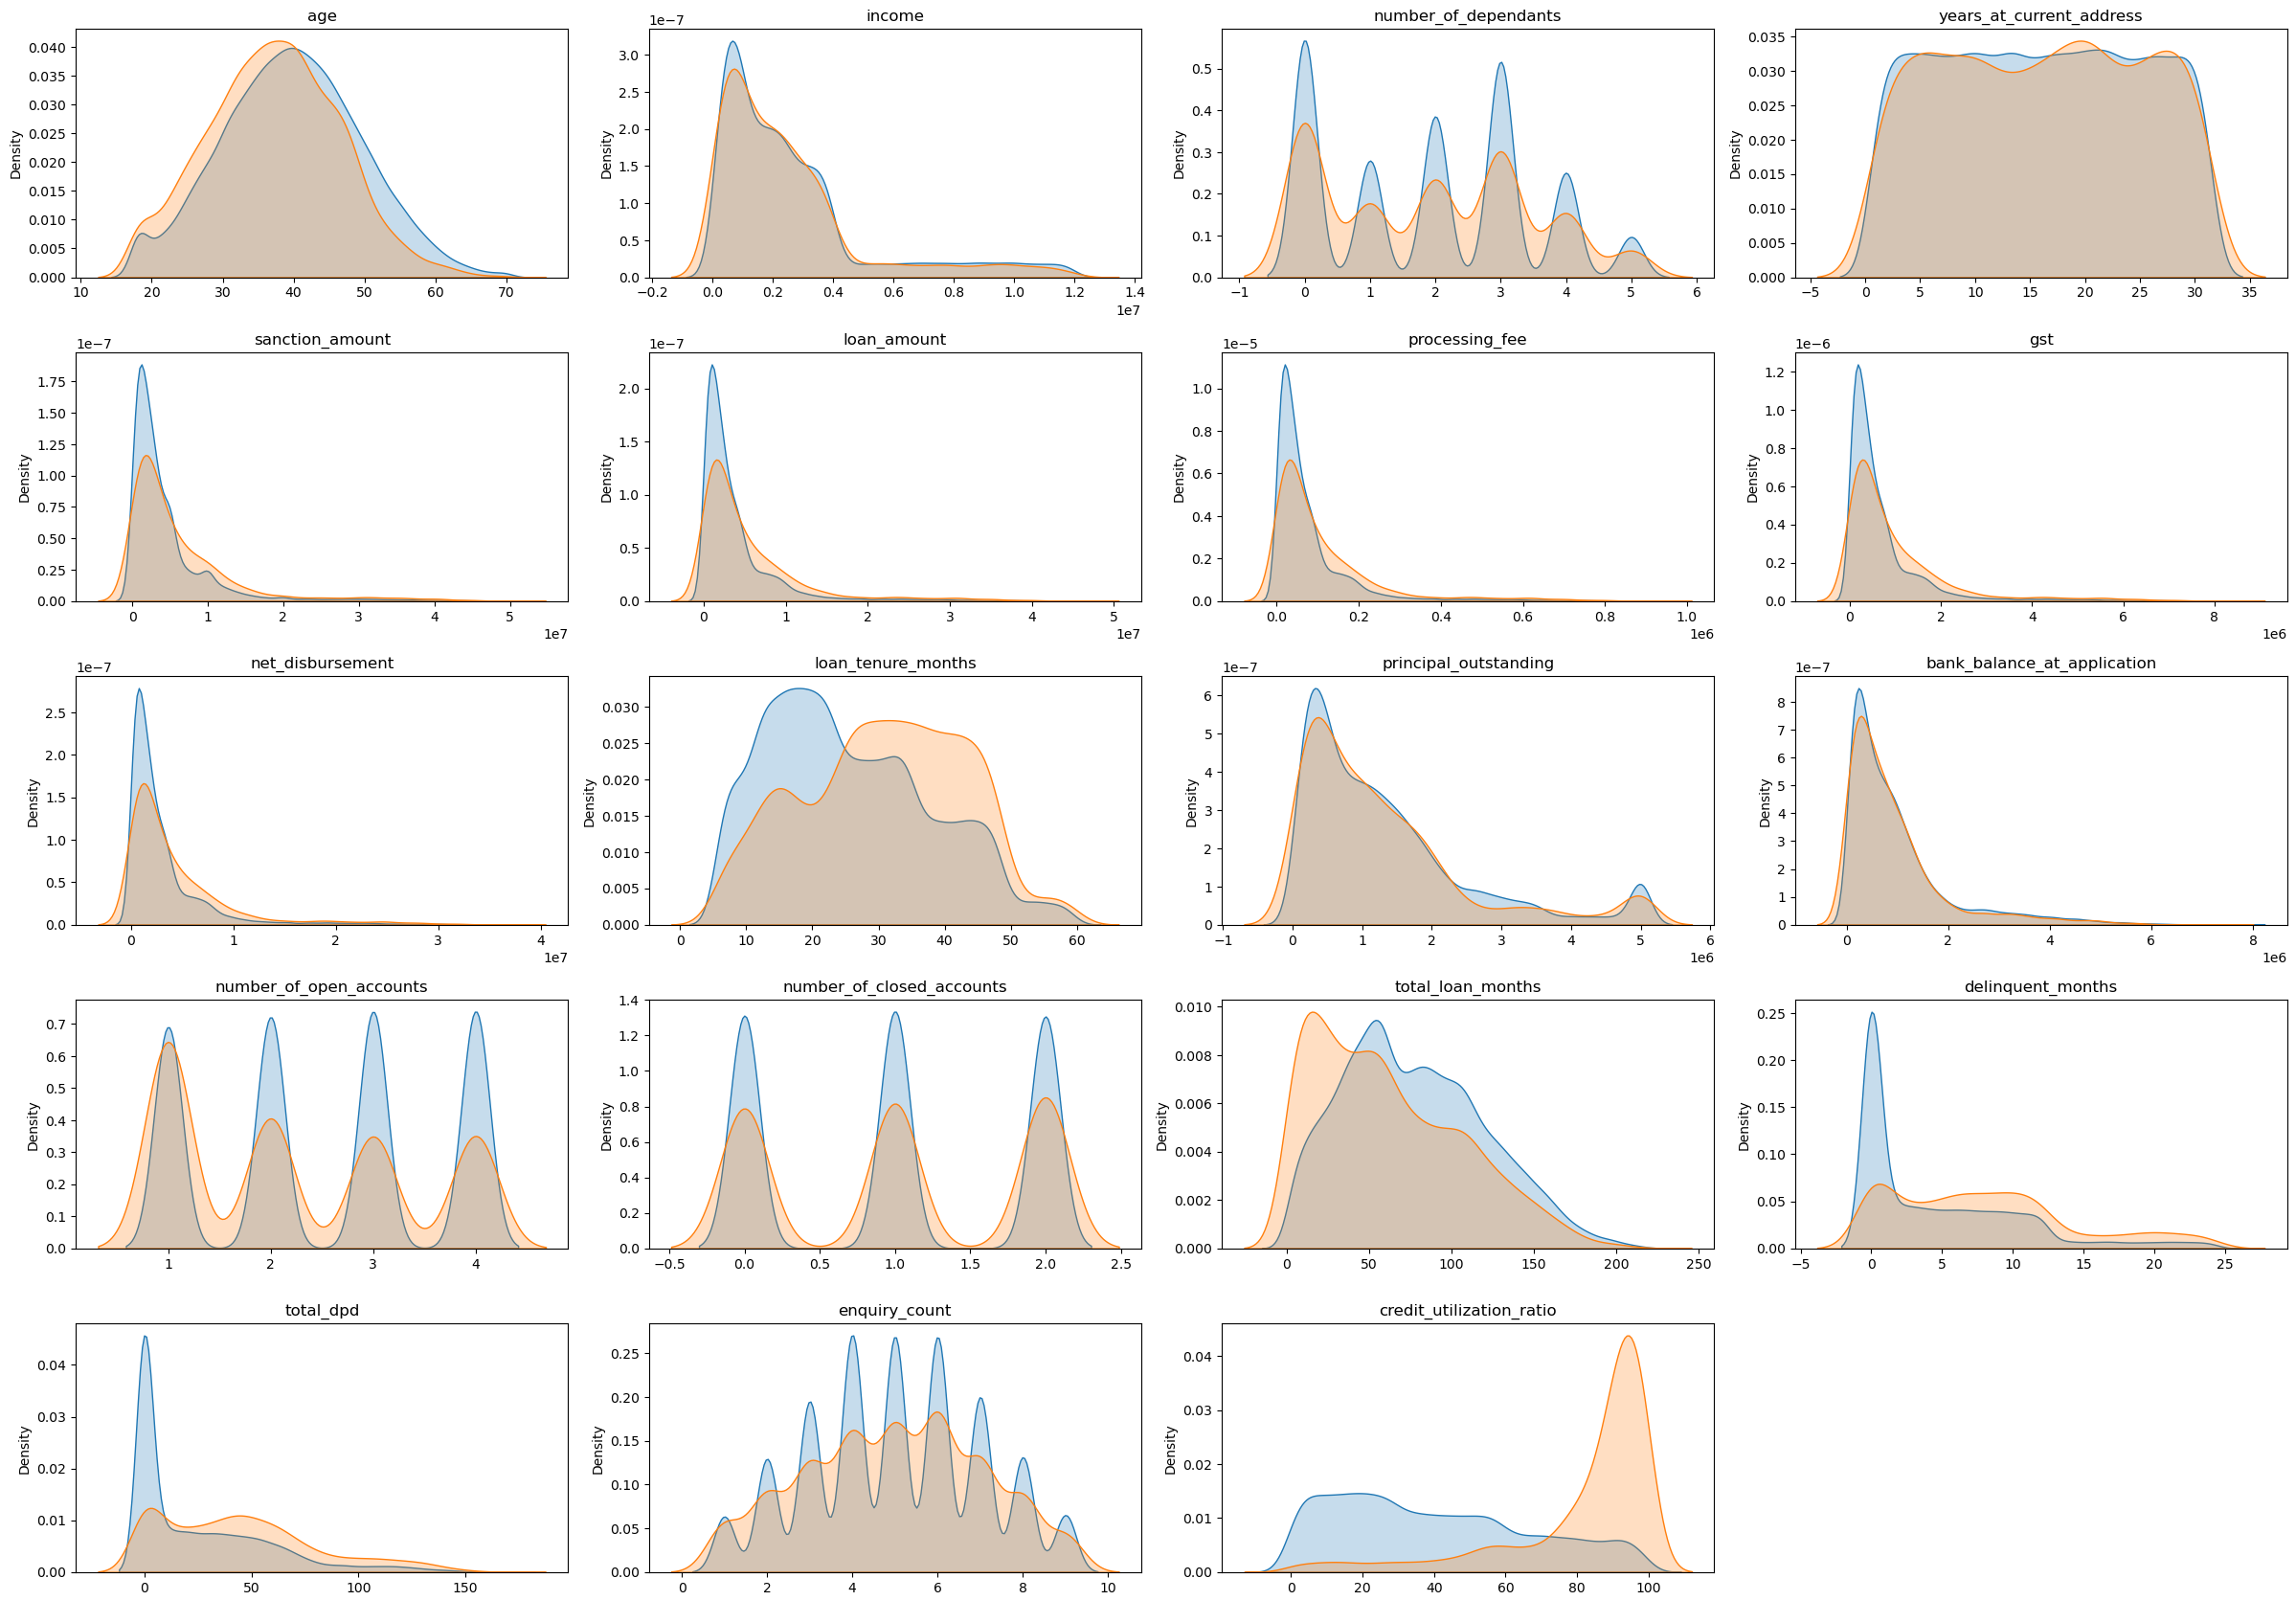

In [35]:
plt.figure(figsize=(24, 20)) #width and height in inches

for i, col in enumerate(columns_continuous):
    plt.subplot(6, 4, i+1) #1 row, 4 columns, ith subplot
    sns.kdeplot(df_train_1[col][df_train_1['default']==0], fill=True, label='default=0')
    sns.kdeplot(df_train_1[col][df_train_1['default']==1], fill=True, label='default=1')
    plt.title(col)
    plt.xlabel(' ')

plt.tight_layout()
plt.show()

Insights:
1. In columns: loan_tenure_months, delinquent_months, total_dpd, credit_utilization, higher values indicate high likelyhood of becoming a default. Hence these 4 looks like strong predictors
2. In remaining columns the distributions do not give any obvious insights
3. Why loan amount and income did not give any signs of being strong predictors? May be when we combine these two and get loan to income ratio(LTI), that may have influence on the target variable. We will explore more later

<h3 aligns="centre" styles="color:blue"> Feature Engineering</h3>

In [36]:
#compute loan to income ratio
df_train_1["loan_to_income"] = df_train_1["loan_amount"]/df_train_1["income"]
df_train_1["loan_to_income"].describe()

#compute loan to income ratio
df_test_1["loan_to_income"] = df_test_1["loan_amount"]/df_test_1["income"]
df_test_1["loan_to_income"].describe()

count   12497.00
mean        1.55
std         0.97
min         0.30
25%         0.78
50%         1.16
75%         2.43
max         4.59
Name: loan_to_income, dtype: float64

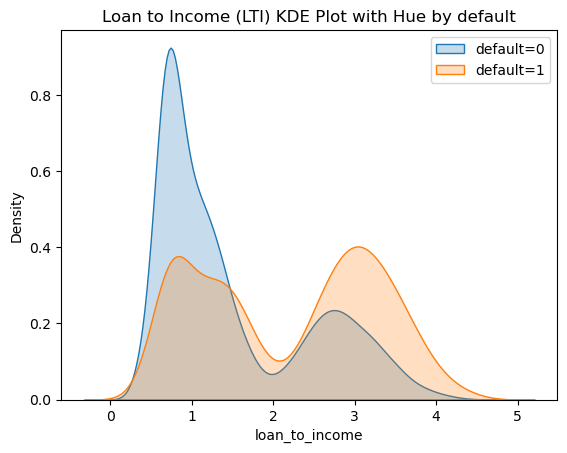

In [37]:
sns.kdeplot(df_train_1[df_train_1.default==0]['loan_to_income'], fill=True, label='default=0')
sns.kdeplot(df_train_1[df_train_1.default==1]['loan_to_income'], fill=True, label='default=1')
plt.title(f"Loan to Income (LTI) KDE Plot with Hue by default")
plt.legend()
plt.show()

In [38]:
df_train_1[["delinquent_months", "total_loan_months"]]

,delinquent_months,total_loan_months
12746,20,152
32495,10,160
43675,12,54
9040,0,76
13077,0,60
...,...,...
28515,0,40
5558,14,52
45236,11,130
49228,0,88


In [39]:
df_train_1['delinquency_ratio'] = (df_train_1['delinquent_months']*100 / df_train_1['total_loan_months']).round(1)
df_test_1['delinquency_ratio'] = (df_test_1['delinquent_months']*100 / df_test_1['total_loan_months']).round(1)
df_train_1[["delinquent_months", "total_loan_months", "delinquency_ratio"]].head(3)

,delinquent_months,total_loan_months,delinquency_ratio
12746,20,152,13.20
32495,10,160,6.20
43675,12,54,22.20


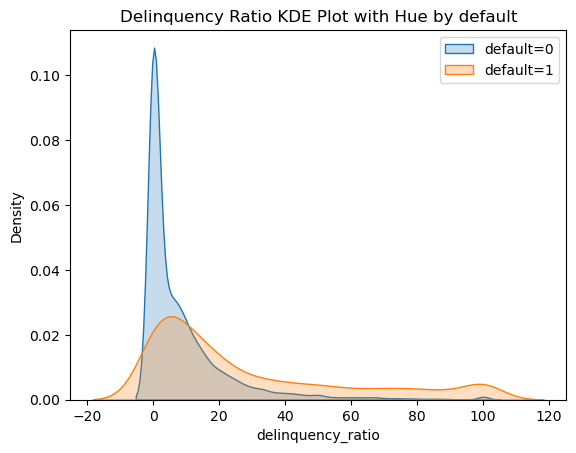

In [40]:
sns.kdeplot(df_train_1[df_train_1.default==0]['delinquency_ratio'], fill=True, label='default=0')
sns.kdeplot(df_train_1[df_train_1.default==1]['delinquency_ratio'], fill=True, label='default=1')
plt.title(f"Delinquency Ratio KDE Plot with Hue by default")
plt.legend()
plt.show()

In [41]:
#df_train_1['avg_dpd_per_delinquency'] = (df_train_1['total_dpd']/df_train_1['delinquent_months']).round(1)
#df_train_1['avg_dpd_per_delinquency'].isna().sum()
#When we use the above there are 15088 null records that appear due to divisible by '0' issue
df_train_1['avg_dpd_per_delinquency'] = np.where(
    df_train_1['delinquent_months'] != 0,
    (df_train_1['total_dpd']/df_train_1['delinquent_months']).round(1),
    0
)
df_train_1['avg_dpd_per_delinquency'].isna().sum()

df_test_1['avg_dpd_per_delinquency'] = np.where(
    df_test_1['delinquent_months'] != 0,
    (df_test_1['total_dpd']/df_test_1['delinquent_months']).round(1),
    0
)

In [42]:
df_train_1['avg_dpd_per_delinquency'].describe()

count   37488.00
mean        3.28
std         2.91
min         0.00
25%         0.00
50%         4.30
75%         5.72
max        10.00
Name: avg_dpd_per_delinquency, dtype: float64

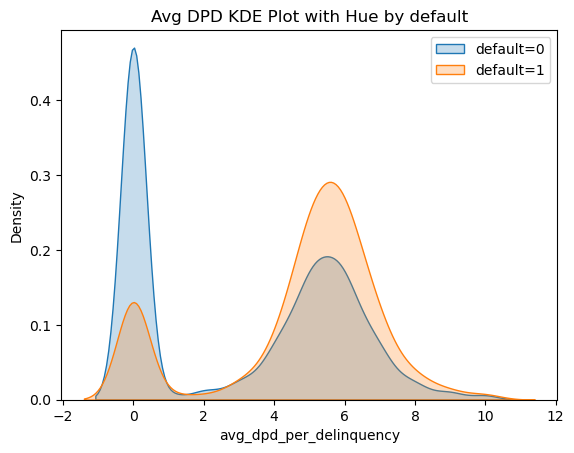

In [43]:
sns.kdeplot(df_train_1[df_train_1.default==0]['avg_dpd_per_delinquency'], fill=True, label='default=0')
sns.kdeplot(df_train_1[df_train_1.default==1]['avg_dpd_per_delinquency'], fill=True, label='default=1')
plt.title(f"Avg DPD KDE Plot with Hue by default")
plt.legend()
plt.show()

In [44]:
df_train_1.columns

Index(['cust_id', 'age', 'gender', 'marital_status', 'employment_status',
       'income', 'number_of_dependants', 'residence_type',
       'years_at_current_address', 'city', 'state', 'zipcode', 'loan_id',
       'loan_purpose', 'loan_type', 'sanction_amount', 'loan_amount',
       'processing_fee', 'gst', 'net_disbursement', 'loan_tenure_months',
       'principal_outstanding', 'bank_balance_at_application',
       'disbursal_date', 'installment_start_dt', 'number_of_open_accounts',
       'number_of_closed_accounts', 'total_loan_months', 'delinquent_months',
       'total_dpd', 'enquiry_count', 'credit_utilization_ratio', 'default',
       'loan_to_income', 'delinquency_ratio', 'avg_dpd_per_delinquency'],
      dtype='object')

### Feature Selection

In [45]:
#drop unnecassary columns
df_train_2 = df_train_1.drop(["cust_id", "loan_id"], axis = 'columns')
df_test_2 = df_test_1.drop(["cust_id", "loan_id"], axis = 'columns')

In [46]:
#drop additional unnecassary columns
df_train_3 = df_train_2.drop(['disbursal_date', 'installment_start_dt', 'loan_amount', 'income', 
                              'total_loan_months', 'delinquent_months', 'total_dpd'], axis = 'columns')
df_test_3 = df_test_2.drop(['disbursal_date', 'installment_start_dt', 'loan_amount', 'income', 
                              'total_loan_months', 'delinquent_months', 'total_dpd'], axis = 'columns')
df_train_3.columns

Index(['age', 'gender', 'marital_status', 'employment_status',
       'number_of_dependants', 'residence_type', 'years_at_current_address',
       'city', 'state', 'zipcode', 'loan_purpose', 'loan_type',
       'sanction_amount', 'processing_fee', 'gst', 'net_disbursement',
       'loan_tenure_months', 'principal_outstanding',
       'bank_balance_at_application', 'number_of_open_accounts',
       'number_of_closed_accounts', 'enquiry_count',
       'credit_utilization_ratio', 'default', 'loan_to_income',
       'delinquency_ratio', 'avg_dpd_per_delinquency'],
      dtype='object')

In [47]:
df_train_3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37488 entries, 12746 to 37784
Data columns (total 27 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   age                          37488 non-null  int64  
 1   gender                       37488 non-null  object 
 2   marital_status               37488 non-null  object 
 3   employment_status            37488 non-null  object 
 4   number_of_dependants         37488 non-null  int64  
 5   residence_type               37488 non-null  object 
 6   years_at_current_address     37488 non-null  int64  
 7   city                         37488 non-null  object 
 8   state                        37488 non-null  object 
 9   zipcode                      37488 non-null  int64  
 10  loan_purpose                 37488 non-null  object 
 11  loan_type                    37488 non-null  object 
 12  sanction_amount              37488 non-null  int64  
 13  processing_fee   

In [48]:
#need to calculate the variance inflation factor and coefficients
df_train_3.select_dtypes(["int64", "float64"]).columns

Index(['age', 'number_of_dependants', 'years_at_current_address', 'zipcode',
       'sanction_amount', 'processing_fee', 'gst', 'net_disbursement',
       'loan_tenure_months', 'principal_outstanding',
       'bank_balance_at_application', 'number_of_open_accounts',
       'number_of_closed_accounts', 'enquiry_count',
       'credit_utilization_ratio', 'loan_to_income', 'delinquency_ratio',
       'avg_dpd_per_delinquency'],
      dtype='object')

In [49]:
X_train = df_train_3.drop('default', axis = 'columns')
y_train = df_train_3['default']

#To perform VIF we need to performing sclaing
from sklearn.preprocessing import MinMaxScaler

cols_to_scale = df_train_3.select_dtypes(["int64", "float64"]).columns

scaler = MinMaxScaler()
X_train[cols_to_scale] = scaler.fit_transform(X_train[cols_to_scale])
X_train.describe()

,age,number_of_dependants,years_at_current_address,zipcode,sanction_amount,processing_fee,gst,net_disbursement,loan_tenure_months,principal_outstanding,bank_balance_at_application,number_of_open_accounts,number_of_closed_accounts,enquiry_count,credit_utilization_ratio,loan_to_income,delinquency_ratio,avg_dpd_per_delinquency
count,37488.00,37488.00,37488.00,37488.00,37488.00,37488.00,37488.00,37488.00,37488.00,37488.00,37488.00,37488.00,37488.00,37488.00,37488.00,37488.00,37488.00,37488.00
mean,0.41,0.39,0.50,0.52,0.09,0.08,0.08,0.08,0.38,0.26,0.12,0.50,0.50,0.50,0.44,0.29,0.10,0.33
std,0.19,0.31,0.30,0.29,0.12,0.11,0.11,0.11,0.23,0.24,0.13,0.37,0.41,0.25,0.30,0.23,0.17,0.29
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.29,0.00,0.23,0.33,0.02,0.02,0.02,0.02,0.19,0.08,0.03,0.00,0.00,0.38,0.18,0.11,0.00,0.00
50%,0.40,0.40,0.50,0.49,0.05,0.05,0.05,0.05,0.34,0.19,0.08,0.67,0.50,0.50,0.39,0.20,0.04,0.43
75%,0.54,0.60,0.77,0.76,0.10,0.10,0.10,0.10,0.55,0.35,0.16,1.00,1.00,0.62,0.68,0.51,0.13,0.57
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [50]:
X_test = df_test_3.drop('default', axis = 'columns')
y_test = df_test_3['default']

X_test[cols_to_scale] = scaler.transform(X_test[cols_to_scale])
X_test.describe()

,age,number_of_dependants,years_at_current_address,zipcode,sanction_amount,processing_fee,gst,net_disbursement,loan_tenure_months,principal_outstanding,bank_balance_at_application,number_of_open_accounts,number_of_closed_accounts,enquiry_count,credit_utilization_ratio,loan_to_income,delinquency_ratio,avg_dpd_per_delinquency
count,12497.00,12497.00,12497.00,12497.00,12497.00,12497.00,12497.00,12497.00,12497.00,12497.00,12497.00,12497.00,12497.00,12497.00,12497.00,12497.00,12497.00,12497.00
mean,0.42,0.38,0.50,0.53,0.09,0.08,0.08,0.08,0.38,0.26,0.12,0.50,0.50,0.50,0.44,0.29,0.11,0.33
std,0.19,0.31,0.30,0.29,0.12,0.11,0.11,0.11,0.23,0.25,0.13,0.37,0.41,0.25,0.30,0.23,0.17,0.29
min,0.00,0.00,0.00,0.00,-0.00,-0.00,-0.00,-0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.00,0.00,0.00
25%,0.29,0.00,0.23,0.33,0.02,0.02,0.02,0.02,0.19,0.08,0.03,0.00,0.00,0.38,0.18,0.11,0.00,0.00
50%,0.42,0.40,0.50,0.51,0.05,0.05,0.05,0.05,0.34,0.20,0.08,0.33,0.50,0.50,0.39,0.20,0.04,0.44
75%,0.54,0.60,0.77,0.76,0.10,0.09,0.09,0.09,0.55,0.36,0.16,0.67,1.00,0.62,0.68,0.50,0.13,0.58
max,1.00,1.00,1.00,1.00,0.98,0.96,0.96,0.96,1.00,1.00,0.94,1.00,1.00,1.00,1.00,1.01,1.00,1.00


In [51]:
#VIF Function
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(data):
    vif_df = pd.DataFrame()
    vif_df['Column'] = data.columns
    vif_df['VIF'] = [variance_inflation_factor(data.values, i) for i in range(data.shape[1])]
    return vif_df

In [52]:
calculate_vif(X_train[cols_to_scale])

C:\Users\Sandeep\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,Column,VIF
0,age,5.70
1,number_of_dependants,2.73
2,years_at_current_address,3.42
3,zipcode,3.80
4,sanction_amount,101.09
5,processing_fee,inf
6,gst,inf
7,net_disbursement,inf
8,loan_tenure_months,6.18
9,principal_outstanding,16.33


In [53]:
#features to drop due to high vif
#usually we drop columns one by one
features_to_drop_vif = ['sanction_amount', 'processing_fee', 'gst', 'net_disbursement', 'principal_outstanding']

X_train_1 = X_train.drop(features_to_drop_vif, axis = 'columns')
numeric_columns = X_train_1.select_dtypes(['int64', 'float64']).columns
numeric_columns


Index(['age', 'number_of_dependants', 'years_at_current_address', 'zipcode',
       'loan_tenure_months', 'bank_balance_at_application',
       'number_of_open_accounts', 'number_of_closed_accounts', 'enquiry_count',
       'credit_utilization_ratio', 'loan_to_income', 'delinquency_ratio',
       'avg_dpd_per_delinquency'],
      dtype='object')

In [54]:
#calculate vif for numeric columns
vif_df = calculate_vif(X_train_1[numeric_columns])
vif_df

,Column,VIF
0,age,5.43
1,number_of_dependants,2.73
2,years_at_current_address,3.40
3,zipcode,3.78
4,loan_tenure_months,6.02
5,bank_balance_at_application,1.80
6,number_of_open_accounts,4.35
7,number_of_closed_accounts,2.37
8,enquiry_count,6.38
9,credit_utilization_ratio,2.92


In [55]:
#As above all vif values are now below 10
selected_numeric_features_vif = vif_df.Column.values
selected_numeric_features_vif

array(['age', 'number_of_dependants', 'years_at_current_address',
       'zipcode', 'loan_tenure_months', 'bank_balance_at_application',
       'number_of_open_accounts', 'number_of_closed_accounts',
       'enquiry_count', 'credit_utilization_ratio', 'loan_to_income',
       'delinquency_ratio', 'avg_dpd_per_delinquency'], dtype=object)

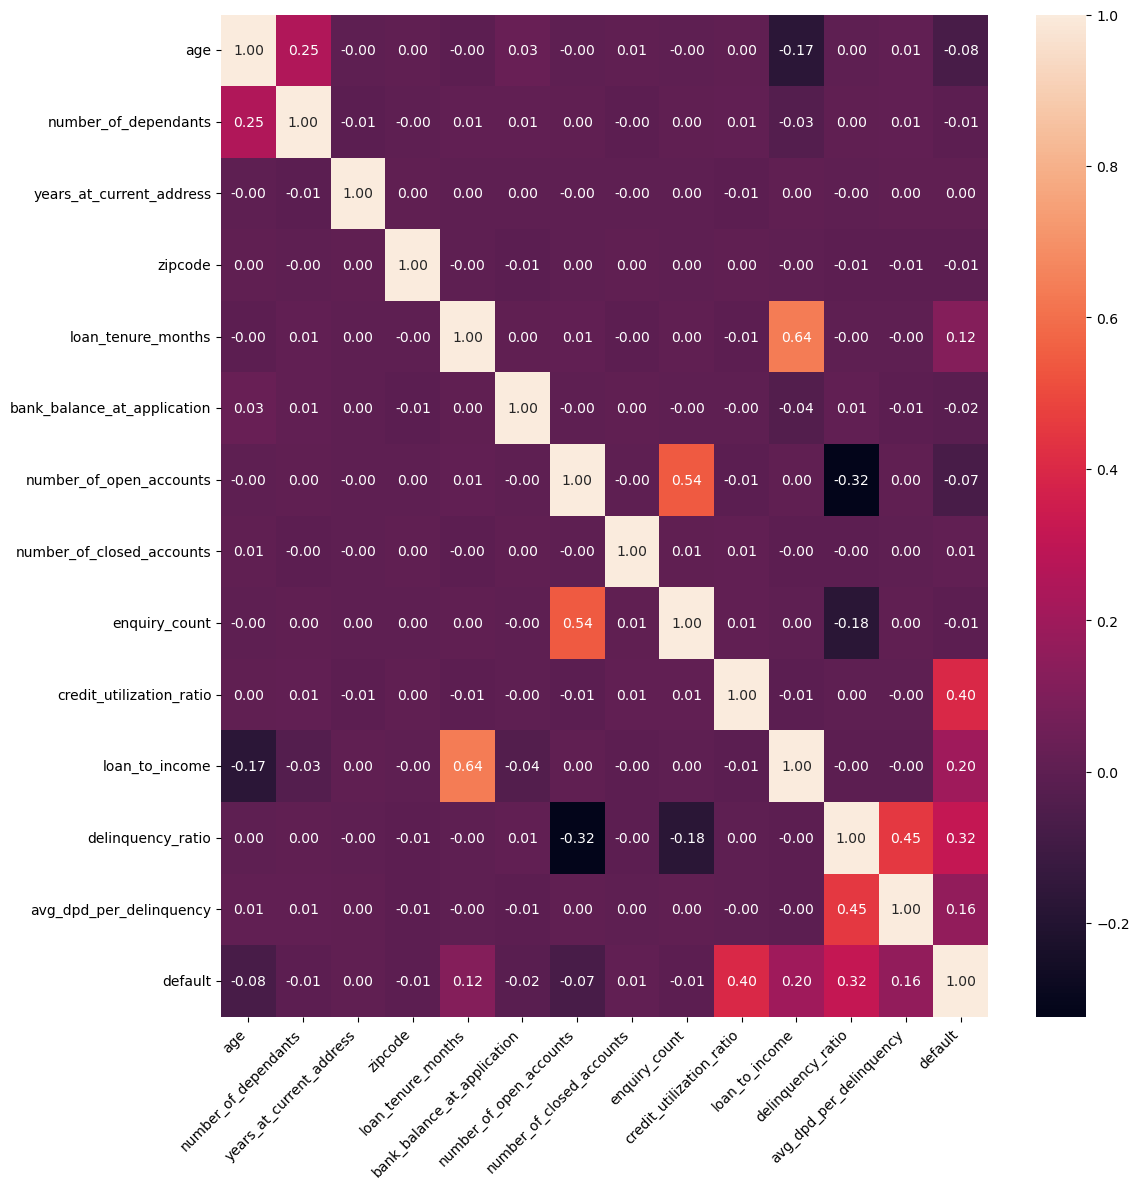

In [56]:
#plot corelation matrix for train dataset
plt.figure(figsize=(12,12))
cm = df_train_3[numeric_columns.append(pd.Index(['default']))].corr()
sns.heatmap(cm, annot=True, fmt='0.2f')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

1. Default has strong co-relation with credit_utilization_ratio, delinquency_ratio, loan_to_income, avg_dpd_per_deliquency

In [57]:
temp = pd.concat([X_train_1, y_train], axis=1)
temp.groupby('loan_purpose')['default'].agg(['count', 'sum'])

,count,sum
loan_purpose,,
Auto,7447,327
Education,5620,559
Home,11304,1734
Personal,13117,603


In [58]:
def calculate_woe_iv(df, feature, target):
    grouped = df.groupby(feature)[target].agg(['count', 'sum'])
    grouped = grouped.rename(columns={'count': 'total', 'sum': 'good'})
    grouped['bad'] = grouped['total']-grouped['good']

    total_good = grouped['good'].sum()
    total_bad = grouped['bad'].sum()

    grouped['good_pct'] = grouped['good'] / total_good
    grouped['bad_pct'] = grouped['bad'] / total_bad
    grouped['woe'] = np.log(grouped['good_pct']/ grouped['bad_pct'])
    grouped['iv'] = (grouped['good_pct'] - grouped['bad_pct'])*grouped['woe']

    #handle devide by zero problem
    grouped['woe'] = grouped['woe'].replace([np.inf, -np.inf], 0)
    grouped['iv'] = grouped['iv'].replace([np.inf, -np.inf], 0)

    total_iv = grouped['iv'].sum()
    
    return grouped, total_iv

grouped, total_iv = calculate_woe_iv(temp, 'loan_purpose', 'default')
grouped

,total,good,bad,good_pct,bad_pct,woe,iv
loan_purpose,,,,,,,
Auto,7447,327,7120,0.10,0.21,-0.72,0.08
Education,5620,559,5061,0.17,0.15,0.16,0.00
Home,11304,1734,9570,0.54,0.28,0.66,0.17
Personal,13117,603,12514,0.19,0.37,-0.67,0.12


In [59]:
iv_values = {}

for feature in X_train_1.columns:
    if X_train_1[feature].dtype == 'object':
        _, iv = calculate_woe_iv(temp, feature, 'default')
    else:
        X_binned = pd.cut(X_train_1[feature], bins=10, labels = False)
        _, iv = calculate_woe_iv(pd.concat([X_binned, y_train], axis=1), feature, 'default')
    iv_values[feature] = iv

iv_values    

{'age': 0.0890689462679479,
 'gender': 0.00047449502170914947,
 'marital_status': 0.001129766845390142,
 'employment_status': 0.003953046301722585,
 'number_of_dependants': 0.0019380899135053508,
 'residence_type': 0.246745268718145,
 'years_at_current_address': 0.0020800513608156363,
 'city': 0.0019059578709781529,
 'state': 0.0019005589806779287,
 'zipcode': 0.0016677413243392572,
 'loan_purpose': 0.3691197842282755,
 'loan_type': 0.16319324904149224,
 'loan_tenure_months': 0.21893515090196278,
 'bank_balance_at_application': 0.0063187993277516365,
 'number_of_open_accounts': 0.08463134083005877,
 'number_of_closed_accounts': 0.0011964272592421567,
 'enquiry_count': 0.007864214085342608,
 'credit_utilization_ratio': 2.352965568168245,
 'loan_to_income': 0.47572195076776647,
 'delinquency_ratio': 0.716576108689321,
 'avg_dpd_per_delinquency': 0.40151905412190175}

In [60]:
#iv values of categorical featues
pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x))
iv_df = pd.DataFrame(list(iv_values.items()), columns=['Feature', 'IV'])
iv_df = iv_df.sort_values(by = 'IV', ascending = False)
iv_df

,Feature,IV
17,credit_utilization_ratio,2.353
19,delinquency_ratio,0.717
18,loan_to_income,0.476
20,avg_dpd_per_delinquency,0.402
10,loan_purpose,0.369
5,residence_type,0.247
12,loan_tenure_months,0.219
11,loan_type,0.163
0,age,0.089
14,number_of_open_accounts,0.085


In [61]:
#select the features with iv more than 0.02
selected_features_iv = [feature for feature, iv in iv_values.items() if iv > 0.02]
selected_features_iv

['age',
 'residence_type',
 'loan_purpose',
 'loan_type',
 'loan_tenure_months',
 'number_of_open_accounts',
 'credit_utilization_ratio',
 'loan_to_income',
 'delinquency_ratio',
 'avg_dpd_per_delinquency']

### Feature Encoding

In [62]:
X_train_reduced = X_train_1[selected_features_iv]
X_test_reduced = X_test[selected_features_iv]

In [63]:
X_train_reduced.head()

,age,residence_type,loan_purpose,loan_type,loan_tenure_months,number_of_open_accounts,credit_utilization_ratio,loan_to_income,delinquency_ratio,avg_dpd_per_delinquency
12746,0.788,Owned,Home,Secured,0.415,1.000,0.364,0.415,0.132,0.590
32495,0.500,Owned,Education,Secured,0.830,0.667,0.051,0.307,0.062,0.620
43675,0.385,Mortgage,Home,Secured,0.491,0.000,0.000,0.759,0.222,0.560
9040,0.462,Mortgage,Education,Secured,0.642,0.667,0.879,0.195,0.000,0.000
13077,0.769,Owned,Personal,Unsecured,0.170,0.000,0.717,0.047,0.000,0.000


In [64]:
#create encoding one hot encoding
#drop first column to avoid multi-colearity
X_train_encoded = pd.get_dummies(X_train_reduced, drop_first = True)
X_test_encoded = pd.get_dummies(X_test_reduced, drop_first = True)

X_train_encoded.head(3)

,age,loan_tenure_months,number_of_open_accounts,credit_utilization_ratio,loan_to_income,delinquency_ratio,avg_dpd_per_delinquency,residence_type_Owned,residence_type_Rented,loan_purpose_Education,loan_purpose_Home,loan_purpose_Personal,loan_type_Unsecured
12746,0.788,0.415,1.000,0.364,0.415,0.132,0.590,True,False,False,True,False,False
32495,0.500,0.830,0.667,0.051,0.307,0.062,0.620,True,False,True,False,False,False
43675,0.385,0.491,0.000,0.000,0.759,0.222,0.560,False,False,False,True,False,False


#### MODEL TRAINING

### Attempt 1:
1. Logitic Regression (for high explanability), RandomForest & 
2. No handling of class inference

In [65]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

model = LogisticRegression()
model.fit(X_train_encoded, y_train)

y_pred = model.predict(X_test_encoded)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     11423
           1       0.85      0.72      0.78      1074

    accuracy                           0.96     12497
   macro avg       0.91      0.85      0.88     12497
weighted avg       0.96      0.96      0.96     12497



In [66]:
#We need recall > 90% as per one of the requirements
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train_encoded, y_train)

y_pred = model.predict(X_test_encoded)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     11423
           1       0.85      0.71      0.77      1074

    accuracy                           0.96     12497
   macro avg       0.91      0.85      0.88     12497
weighted avg       0.96      0.96      0.96     12497



In [67]:
from xgboost import XGBClassifier

model = XGBClassifier()
model.fit(X_train_encoded, y_train)

y_pred = model.predict(X_test_encoded)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.98      0.98      0.98     11423
           1       0.81      0.76      0.78      1074

    accuracy                           0.96     12497
   macro avg       0.90      0.87      0.88     12497
weighted avg       0.96      0.96      0.96     12497



In [68]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Parameter distribution
param_dist = {
    'C': np.logspace(-4, 4, 20),  # logarithmic range from 1e-4 to 1e4
    'solver': ['lbfgs', 'saga', 'liblinear', 'newton-cg']  # allowable solvers
}

# Create Logistic Regression model
log_reg = LogisticRegression(max_iter=1000)

# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=log_reg,
    param_distributions=param_dist,
    n_iter=50,                 # number of random combinations to try
    scoring='f1',              # optimization metric
    cv=3,                      # 3-fold cross-validation
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# Fit the search
random_search.fit(X_train_encoded, y_train)

# Best params and score
print(f"Best Parameters: {random_search.best_params_}")
print(f"Best Score: {random_search.best_score_}")

# Evaluate on test data
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test_encoded)

print("Classification Report:")
print(classification_report(y_test, y_pred))

Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best Parameters: {'solver': 'lbfgs', 'C': 3792.690190732246}
Best Score: 0.7578021834474523
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98     11423
           1       0.83      0.74      0.78      1074

    accuracy                           0.97     12497
   macro avg       0.91      0.86      0.88     12497
weighted avg       0.96      0.97      0.96     12497



In [69]:
# required imports
from scipy.stats import uniform, randint
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.metrics import classification_report
from xgboost import XGBClassifier

# Parameter distribution
param_dist = {
    'n_estimators': [100, 150, 200, 250, 300],
    'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
    'learning_rate': [0.01, 0.03, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],   # <-- added missing comma previously
    'scale_pos_weight': [1, 2, 3, 5, 7, 10],
    'reg_alpha': [0.01, 0.1, 0.5, 1.0, 5.0, 10.0],   # L1
    'reg_lambda': [0.01, 0.1, 0.5, 1.0, 5.0, 10.0]   # L2
}

# Create the XGBoost model
xgb = XGBClassifier(
    use_label_encoder=False,   # avoid deprecation warnings
    eval_metric='logloss',     # sensible default for binary classification
    objective='binary:logistic',
    n_jobs=-1,
    random_state=42
)

# Use StratifiedKFold for imbalanced classification problems
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# Set up RandomizedSearchCV (correct name and estimator param)
random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_dist,
    n_iter=100,
    scoring='f1',
    cv=cv,
    verbose=1,
    n_jobs=-1,
    random_state=42
)

# Fit the RandomizedSearchCV
random_search.fit(X_train_encoded, y_train)

# Print results
print(f"Best Parameters: {random_search.best_params_}")
print(f"Best Score: {random_search.best_score_:.4f}")

best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test_encoded)

print("Classification Report:")
print(classification_report(y_test, y_pred))


Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best Parameters: {'subsample': 0.8, 'scale_pos_weight': 2, 'reg_lambda': 1.0, 'reg_alpha': 5.0, 'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.2, 'colsample_bytree': 0.9}
Best Score: 0.7890
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98     11423
           1       0.77      0.83      0.80      1074

    accuracy                           0.96     12497
   macro avg       0.88      0.90      0.89     12497
weighted avg       0.97      0.96      0.96     12497



C:\Users\Sandeep\AppData\Roaming\Python\Python313\site-packages\xgboost\training.py:199: UserWarning: [19:37:10] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


### Attempt 2
1. Logistic Regression & XGB
2. Handle Class Imbalance Using Under Sampling

In [70]:
# as class balance was 90% for '1' and 10% for '0'
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state = 42)
X_train_rus, y_train_rus = rus.fit_resample(X_train_encoded, y_train)
y_train_rus.value_counts()

default
0    3223
1    3223
Name: count, dtype: int64

In [71]:
model = LogisticRegression()
model.fit(X_train_rus, y_train_rus)

y_pred = model.predict(X_test_encoded)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      0.91      0.95     11423
           1       0.51      0.95      0.67      1074

    accuracy                           0.92     12497
   macro avg       0.75      0.93      0.81     12497
weighted avg       0.95      0.92      0.93     12497



In [72]:
model = XGBClassifier(**random_search.best_params_)
model.fit(X_train_rus, y_train_rus)

y_pred = model.predict(X_test_encoded)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      0.91      0.95     11423
           1       0.50      0.98      0.67      1074

    accuracy                           0.92     12497
   macro avg       0.75      0.95      0.81     12497
weighted avg       0.96      0.92      0.93     12497



## Attempt 3
1. Logistic Regression
2. Handle Class Imbalance Using SMOTE Tomek
3. Parameter tuning using optuna

In [73]:
from imblearn.combine import SMOTETomek

smt = SMOTETomek(random_state = 42)
X_train_smt, y_train_smt = smt.fit_resample (X_train_encoded, y_train)
y_train_smt.value_counts()

default
0    34194
1    34194
Name: count, dtype: int64

In [74]:
model = LogisticRegression()
model.fit(X_train_smt, y_train_smt)

y_pred = model.predict(X_test_encoded)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.99      0.93      0.96     11423
           1       0.55      0.94      0.70      1074

    accuracy                           0.93     12497
   macro avg       0.77      0.94      0.83     12497
weighted avg       0.96      0.93      0.94     12497



In [ ]:
#Hyperparameter Tuning using GridSearchCV & RandomSearchCV
#Here we will use Optuna to find the best hyperparameters

## HYPERPARAMETER TUNING USING OPTUNA

In [75]:
import optuna
from sklearn.metrics import make_scorer, f1_score
from sklearn.model_selection import cross_val_score

In [78]:
#Define the objective function for Optuna
def objective(trial):
    param = {
        'C': trial.suggest_float('C', 1e-4, 1e4, log = True), #Logarithmically spaced values
        'solver': trial.suggest_categorical('solver', ['lbfgs', 'liblinear', 'saga', 'newton-cg']), #Solvers
        'tol': trial.suggest_float('tol', 1e-6, 1e-1, log = True), #Logarithmically spaced values for tolerance
        'class_weight': trial.suggest_categorical('class_weight', [None, 'balanced']) #class weights
    }

    model = LogisticRegression(**param, max_iter=10000)

    #Calculate the cross-validation f1_score
    f1_scorer = make_scorer(f1_score, average = 'macro')
    scores = cross_val_score(model, X_train_smt, y_train_smt, cv=3, scoring=f1_scorer, n_jobs = -1)

    return np.mean(scores)

study_logistic = optuna.create_study(direction='maximize')
study_logistic.optimize(objective, n_trials=50)

[I 2025-12-11 19:41:27,721] A new study created in memory with name: no-name-2ed0d522-53a1-4b8f-b024-af265ec2f879
[I 2025-12-11 19:41:27,996] Trial 0 finished with value: 0.9456480978156508 and parameters: {'C': 12.138118181605607, 'solver': 'lbfgs', 'tol': 1.6757922227696233e-05, 'class_weight': 'balanced'}. Best is trial 0 with value: 0.9456480978156508.
[I 2025-12-11 19:41:28,113] Trial 1 finished with value: 0.7699026867852142 and parameters: {'C': 0.002140607240329995, 'solver': 'newton-cg', 'tol': 0.0573111636313408, 'class_weight': 'balanced'}. Best is trial 0 with value: 0.9456480978156508.
[I 2025-12-11 19:41:28,297] Trial 2 finished with value: 0.938204561926446 and parameters: {'C': 0.06077270428808954, 'solver': 'newton-cg', 'tol': 0.003334112761761731, 'class_weight': None}. Best is trial 0 with value: 0.9456480978156508.
[I 2025-12-11 19:41:28,395] Trial 3 finished with value: 0.8591983188941607 and parameters: {'C': 27.94455854358114, 'solver': 'newton-cg', 'tol': 0.0607

In [79]:
print('Best Trial')
trial = study_logistic.best_trial
print(' f1-score: {}'.format(trial.value))
print(' Params: ')
for key, value in trial.params.items():
    print('  {}: {}'.format(key, value))

best_model_logistic = LogisticRegression(**study_logistic.best_params)
best_model_logistic.fit(X_train_smt, y_train_smt)

#Evaluate on the test set
y_pred = best_model_logistic.predict(X_test_encoded)

report = classification_report(y_test, y_pred)
print(report)

Best Trial
 f1-score: 0.9458512211584464
 Params: 
  C: 3.973105798221535
  solver: liblinear
  tol: 1.674439096139092e-06
  class_weight: None
              precision    recall  f1-score   support

           0       0.99      0.93      0.96     11423
           1       0.56      0.94      0.70      1074

    accuracy                           0.93     12497
   macro avg       0.78      0.94      0.83     12497
weighted avg       0.96      0.93      0.94     12497



## Attempt 4
1. XGBoost
2. Handle Class Imbalance Using SMOTE Tomek
3. Parameter tuning using optuna

In [82]:
#Define the objective function for optuna
def objective(trial):
    param = {
        'objective': 'binary:logistic',
        'eval_metric': 'logloss',
        'verbosity': 0,
        'booster': 'gbtree',
        'lambda': trial.suggest_float('lambda', 1e-3, 10.0, log=True),
        'alpha': trial.suggest_float('alpha', 1e-3, 10.0, log=True),
        'subsample': trial.suggest_float('subsample', 0.4, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.4, 1.0),
        'max_depth': trial.suggest_int('max-depth', 3, 10),
        'eta': trial.suggest_float('eta', 0.01, 0.3),
        'gamma': trial.suggest_float('gamma', 0, 10),
        'scale_pos_weight': trial.suggest_float('scale_pos_weight', 1, 10),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'max_delta_step': trial.suggest_int('max_delta_step', 0, 10),
    }

    model = XGBClassifier(**param)

    #Calculate the cross-validated f1_score
    f1_scorer = make_scorer(f1_score, average='macro')
    scores = cross_val_score(model, X_train_smt, y_train_smt, cv=3, scoring=f1_scorer, n_jobs=-1)

    return np.mean(scores)

study_xgb = optuna.create_study(direction='maximize')
study_xgb.optimize(objective, n_trials = 50)

[I 2025-12-11 20:20:38,572] A new study created in memory with name: no-name-9b51a666-4e65-498f-b6f6-b670e3ffd93b
[I 2025-12-11 20:20:41,205] Trial 0 finished with value: 0.9600692878491585 and parameters: {'lambda': 1.7558176564096668, 'alpha': 0.00976248214509398, 'subsample': 0.7526007253983324, 'colsample_bytree': 0.8974455767691197, 'max-depth': 5, 'eta': 0.23508781741374205, 'gamma': 7.289051967239194, 'scale_pos_weight': 7.728628803413514, 'min_child_weight': 3, 'max_delta_step': 10}. Best is trial 0 with value: 0.9600692878491585.
[I 2025-12-11 20:20:43,983] Trial 1 finished with value: 0.9745350380456045 and parameters: {'lambda': 1.528850282389554, 'alpha': 0.12392191932975989, 'subsample': 0.7926394443580718, 'colsample_bytree': 0.964884384705435, 'max-depth': 8, 'eta': 0.1737473892995232, 'gamma': 0.5394237983759886, 'scale_pos_weight': 1.8446633878975454, 'min_child_weight': 8, 'max_delta_step': 1}. Best is trial 1 with value: 0.9745350380456045.
[I 2025-12-11 20:20:44,669

In [83]:
print('Best Trial')
trial = study_xgb.best_trial
print(' F1-score: {}'.format(trial.value))
print(' Params: ')
for key, value in trial.params.items():
    print('  {}: {}'.format(key, value))

best_params = study_xgb.best_params
best_model_xgb = XGBClassifier(**best_params)
best_model_xgb.fit(X_train_smt, y_train_smt)

#Evaluate on the test set
y_pred = best_model_xgb.predict(X_test_encoded)

report = classification_report(y_test, y_pred)
print(report)

Best Trial
 F1-score: 0.9750334343188675
 Params: 
  lambda: 1.056542446601578
  alpha: 0.1125271180707616
  subsample: 0.8215692364404751
  colsample_bytree: 0.9573365517680272
  max-depth: 8
  eta: 0.19399044474010976
  gamma: 0.632617162663645
  scale_pos_weight: 1.6314372065229885
  min_child_weight: 8
  max_delta_step: 1


C:\Users\Sandeep\AppData\Roaming\Python\Python313\site-packages\xgboost\training.py:199: UserWarning: [20:26:22] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "max-depth" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


              precision    recall  f1-score   support

           0       0.99      0.96      0.97     11423
           1       0.67      0.91      0.77      1074

    accuracy                           0.95     12497
   macro avg       0.83      0.93      0.87     12497
weighted avg       0.96      0.95      0.96     12497



In [87]:
#we are selecting the logictic regression based on it's higher recall score
y_pred = best_model_logistic.predict(X_test_encoded)
report = classification_report(y_pred, y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10676
           1       1.00      1.00      1.00      1821

    accuracy                           1.00     12497
   macro avg       1.00      1.00      1.00     12497
weighted avg       1.00      1.00      1.00     12497



In [89]:
from sklearn.metrics import roc_curve

probabilities = best_model_logistic.predict_proba(X_test_encoded)[:,1]
probabilities

fpr, tpr, thresholds = roc_curve(y_test, probabilities)
fpr[:10], tpr[:10], thresholds[:10]

(array([0.        , 0.        , 0.        , 0.00008754, 0.00008754,
        0.00017509, 0.00017509, 0.00026263, 0.00026263, 0.00035017]),
 array([0.        , 0.0009311 , 0.16201117, 0.16201117, 0.17504655,
        0.17504655, 0.21973929, 0.21973929, 0.22905028, 0.22905028]),
 array([       inf, 1.        , 0.99940595, 0.99939817, 0.9992827 ,
        0.99927573, 0.99864828, 0.99863082, 0.99834174, 0.99833987]))

In [94]:
from sklearn.metrics import auc

area = auc(fpr, tpr)
area

0.9836790780011773

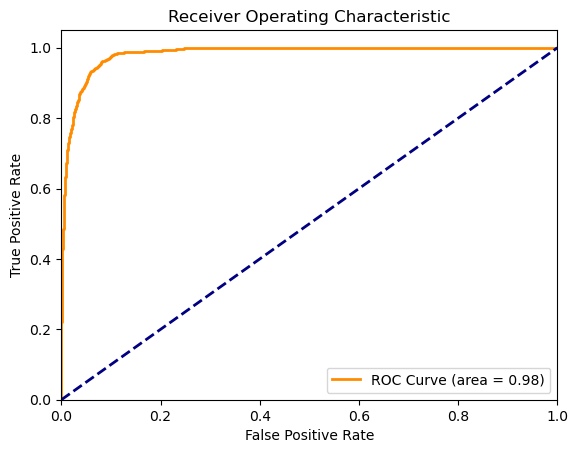

In [95]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC Curve (area = %0.2f)' % area)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

### Model Evaluation: RANKORDER & KS STATISTICS & GINI COEFF

In [107]:
probabilities = best_model_logistic.predict_proba(X_test_encoded)[:,1]

df_eval = pd.DataFrame({
    'Default Truth': y_test,
    'Default Probability': probabilities
})
df_eval.head(3)

,Default Truth,Default Probability
19205,0,0.539
15514,0,0.000
30367,0,0.006


In [108]:
df_eval['Decile'] = pd.qcut(df_eval['Default Probability'], 10, labels=False, duplicates='drop')
df_eval.head(3)

,Default Truth,Default Probability,Decile
19205,0,0.539,8
15514,0,0.000,2
30367,0,0.006,6


In [109]:
df_eval[df_eval.Decile==8]['Default Probability'].describe()

count   1250.000
mean       0.487
std        0.181
min        0.218
25%        0.321
50%        0.467
75%        0.641
max        0.816
Name: Default Probability, dtype: float64

In [105]:
df_eval[df_eval.Decile==8]['Default Probability'].describe()

count   1250.000
mean       0.487
std        0.181
min        0.218
25%        0.321
50%        0.467
75%        0.641
max        0.816
Name: Default Probability, dtype: float64

In [110]:
df_decile = df_eval.groupby('Decile').apply(lambda x: pd.Series({
    'Minimum Probability': x['Default Probability'].min(),
    'Maximum Probability': x['Default Probability'].max(),
    'Events': x['Default Truth'].sum(),
    'Non-events': x['Default Truth'].count() - x['Default Truth'].sum(),    
}))
df_decile.reset_index(inplace=True)
df_decile

C:\Users\Sandeep\AppData\Local\Temp\ipykernel_21104\4037021561.py:1: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_decile = df_eval.groupby('Decile').apply(lambda x: pd.Series({


,Decile,Minimum Probability,Maximum Probability,Events,Non-events
0,0,0.000,0.000,0.000,1250.000
1,1,0.000,0.000,0.000,1250.000
2,2,0.000,0.000,0.000,1249.000
3,3,0.000,0.000,0.000,1250.000
4,4,0.000,0.001,0.000,1250.000
5,5,0.001,0.005,0.000,1249.000
6,6,0.005,0.030,5.000,1245.000
7,7,0.030,0.217,10.000,1239.000
8,8,0.218,0.816,161.000,1089.000
9,9,0.817,1.000,898.000,352.000


In [111]:
df_decile['Event Rate'] = df_decile['Events']*100 / (df_decile['Events']+df_decile['Non-events'])
df_decile['Non-event Rate'] = df_decile['Non-events']*100 / (df_decile['Events']+df_decile['Non-events'])
df_decile

,Decile,Minimum Probability,Maximum Probability,Events,Non-events,Event Rate,Non-event Rate
0,0,0.000,0.000,0.000,1250.000,0.000,100.000
1,1,0.000,0.000,0.000,1250.000,0.000,100.000
2,2,0.000,0.000,0.000,1249.000,0.000,100.000
3,3,0.000,0.000,0.000,1250.000,0.000,100.000
4,4,0.000,0.001,0.000,1250.000,0.000,100.000
5,5,0.001,0.005,0.000,1249.000,0.000,100.000
6,6,0.005,0.030,5.000,1245.000,0.400,99.600
7,7,0.030,0.217,10.000,1239.000,0.801,99.199
8,8,0.218,0.816,161.000,1089.000,12.880,87.120
9,9,0.817,1.000,898.000,352.000,71.840,28.160


In [112]:
df_decile = df_decile.sort_values(by='Decile', ascending=False).reset_index(drop=True)
df_decile

,Decile,Minimum Probability,Maximum Probability,Events,Non-events,Event Rate,Non-event Rate
0,9,0.817,1.000,898.000,352.000,71.840,28.160
1,8,0.218,0.816,161.000,1089.000,12.880,87.120
2,7,0.030,0.217,10.000,1239.000,0.801,99.199
3,6,0.005,0.030,5.000,1245.000,0.400,99.600
4,5,0.001,0.005,0.000,1249.000,0.000,100.000
5,4,0.000,0.001,0.000,1250.000,0.000,100.000
6,3,0.000,0.000,0.000,1250.000,0.000,100.000
7,2,0.000,0.000,0.000,1249.000,0.000,100.000
8,1,0.000,0.000,0.000,1250.000,0.000,100.000
9,0,0.000,0.000,0.000,1250.000,0.000,100.000


In [113]:
df_decile['Cum Events'] =  df_decile['Events'].cumsum()
df_decile['Cum Non-events'] =  df_decile['Non-events'].cumsum()
df_decile

,Decile,Minimum Probability,Maximum Probability,Events,Non-events,Event Rate,Non-event Rate,Cum Events,Cum Non-events
0,9,0.817,1.000,898.000,352.000,71.840,28.160,898.000,352.000
1,8,0.218,0.816,161.000,1089.000,12.880,87.120,1059.000,1441.000
2,7,0.030,0.217,10.000,1239.000,0.801,99.199,1069.000,2680.000
3,6,0.005,0.030,5.000,1245.000,0.400,99.600,1074.000,3925.000
4,5,0.001,0.005,0.000,1249.000,0.000,100.000,1074.000,5174.000
5,4,0.000,0.001,0.000,1250.000,0.000,100.000,1074.000,6424.000
6,3,0.000,0.000,0.000,1250.000,0.000,100.000,1074.000,7674.000
7,2,0.000,0.000,0.000,1249.000,0.000,100.000,1074.000,8923.000
8,1,0.000,0.000,0.000,1250.000,0.000,100.000,1074.000,10173.000
9,0,0.000,0.000,0.000,1250.000,0.000,100.000,1074.000,11423.000


In [114]:
df_decile['Cum Event Rate'] = df_decile['Cum Events'] * 100 / df_decile['Events'].sum()
df_decile['Cum Non-event Rate'] = df_decile['Cum Non-events']*100 / df_decile['Non-events'].sum()
df_decile

,Decile,Minimum Probability,Maximum Probability,Events,Non-events,Event Rate,Non-event Rate,Cum Events,Cum Non-events,Cum Event Rate,Cum Non-event Rate
0,9,0.817,1.000,898.000,352.000,71.840,28.160,898.000,352.000,83.613,3.082
1,8,0.218,0.816,161.000,1089.000,12.880,87.120,1059.000,1441.000,98.603,12.615
2,7,0.030,0.217,10.000,1239.000,0.801,99.199,1069.000,2680.000,99.534,23.461
3,6,0.005,0.030,5.000,1245.000,0.400,99.600,1074.000,3925.000,100.000,34.361
4,5,0.001,0.005,0.000,1249.000,0.000,100.000,1074.000,5174.000,100.000,45.295
5,4,0.000,0.001,0.000,1250.000,0.000,100.000,1074.000,6424.000,100.000,56.237
6,3,0.000,0.000,0.000,1250.000,0.000,100.000,1074.000,7674.000,100.000,67.180
7,2,0.000,0.000,0.000,1249.000,0.000,100.000,1074.000,8923.000,100.000,78.114
8,1,0.000,0.000,0.000,1250.000,0.000,100.000,1074.000,10173.000,100.000,89.057
9,0,0.000,0.000,0.000,1250.000,0.000,100.000,1074.000,11423.000,100.000,100.000


In [115]:
df_decile['KS'] = abs(df_decile['Cum Event Rate'] - df_decile['Cum Non-event Rate'])
df_decile

,Decile,Minimum Probability,Maximum Probability,Events,Non-events,Event Rate,Non-event Rate,Cum Events,Cum Non-events,Cum Event Rate,Cum Non-event Rate,KS
0,9,0.817,1.000,898.000,352.000,71.840,28.160,898.000,352.000,83.613,3.082,80.531
1,8,0.218,0.816,161.000,1089.000,12.880,87.120,1059.000,1441.000,98.603,12.615,85.988
2,7,0.030,0.217,10.000,1239.000,0.801,99.199,1069.000,2680.000,99.534,23.461,76.073
3,6,0.005,0.030,5.000,1245.000,0.400,99.600,1074.000,3925.000,100.000,34.361,65.639
4,5,0.001,0.005,0.000,1249.000,0.000,100.000,1074.000,5174.000,100.000,45.295,54.705
5,4,0.000,0.001,0.000,1250.000,0.000,100.000,1074.000,6424.000,100.000,56.237,43.763
6,3,0.000,0.000,0.000,1250.000,0.000,100.000,1074.000,7674.000,100.000,67.180,32.820
7,2,0.000,0.000,0.000,1249.000,0.000,100.000,1074.000,8923.000,100.000,78.114,21.886
8,1,0.000,0.000,0.000,1250.000,0.000,100.000,1074.000,10173.000,100.000,89.057,10.943
9,0,0.000,0.000,0.000,1250.000,0.000,100.000,1074.000,11423.000,100.000,100.000,0.000


To assess whether rank ordering is followed, we should look at whether higher deciles (those with higher predicted probabilities) have higher event rates compared to lower deciles. Rank ordering means that as you move from the top decile to the bottom decile, the event rate should generally decrease.

Non-Events - termed as good (customers) who do not default. Events - termed as bad (customers) who default.

Events and Non-Events terms are interchanged based on usecase to usecase.

eg: for marketing usecase, which customer to reach out (who will take loan based on offers) will be events - here it will termed as good, and the customers who will not take loans will be non-events (bad).

**Insights from the Decile Table**

1. Top Deciles

* The first decile (Decile 9) has a high event rate of 72.00% and a non-event rate of 28.00%. This indicates that the model is highly confident in predicting events in this decile.
* The second decile (Decile 8) also shows a significant event rate of 12.72%, with a cumulative event rate reaching 98.6%.

2. Middle Deciles:

* Deciles 7 and 6 show a significant drop in event rates

3. Lower Deciles:

* Deciles 5 to 0 show zero events, with all predictions being non-events. These deciles collectively have a non-event rate of 100%.

4. KS Statistic:

* The KS statistic, which is the maximum difference between cumulative event rates and cumulative non-event rates, is highest at Decile 8 with a value of 85.98%. This suggests that the model performs best at distinguishing between events and non-events up to this decile.

* The KS value gradually decreases in the following deciles, indicating a decrease in model performance for distinguishing between events and non-events.

**KS Value**

The highest KS value is 85.98%, found at Decile 8. This indicates that the model's performance in distinguishing between events and non-events is most significant at this decile. (If KS is in top 3 decile and score above 40, it is considered a good predictive model.)

In [116]:
gini_coefficient = 2 * area - 1

print("AUC:", area)
print("Gini Coefficient:", gini_coefficient)

AUC: 0.9836790780011773
Gini Coefficient: 0.9673581560023545


AUC of 0.98: The model is very good at distinguishing between events and non-events.

Gini coefficient of 0.96: This further confirms that the model is highly effective in its predictions, with almost perfect rank ordering capability.

The Gini coefficient ranges from -1 to 1, where a value closer to 1 signifies a perfect model, 0 indicates a model with no discriminative power, and -1 signifies a perfectly incorrect model.

#### Finalize The Model and Visualize Feature Importance

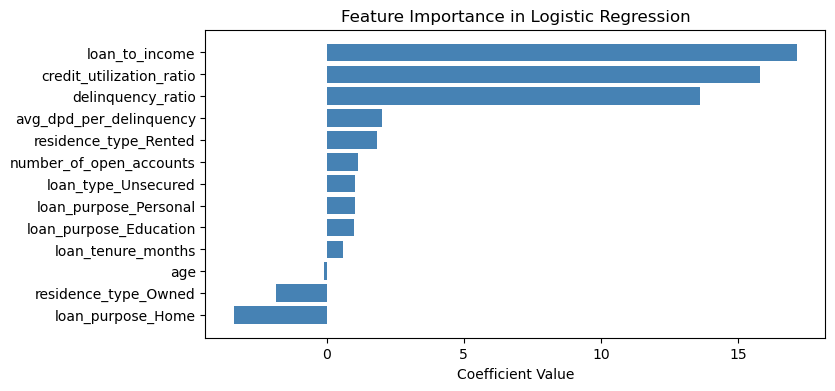

In [117]:
final_model = best_model_logistic

feature_importance = final_model.coef_[0]

# Create a DataFrame for easier handling
coef_df = pd.DataFrame(feature_importance, index=X_train_encoded.columns, columns=['Coefficients'])

# Sort the coefficients for better visualization
coef_df = coef_df.sort_values(by='Coefficients', ascending=True)

# Plotting
plt.figure(figsize=(8, 4))
plt.barh(coef_df.index, coef_df['Coefficients'], color='steelblue')
plt.xlabel('Coefficient Value')
plt.title('Feature Importance in Logistic Regression')
plt.show()

### Save the Model

In [118]:
X_test_encoded.head(2)

,age,loan_tenure_months,number_of_open_accounts,credit_utilization_ratio,loan_to_income,delinquency_ratio,avg_dpd_per_delinquency,residence_type_Owned,residence_type_Rented,loan_purpose_Education,loan_purpose_Home,loan_purpose_Personal,loan_type_Unsecured
19205,0.346,0.755,0.333,0.990,0.552,0.000,0.000,True,False,False,True,False,False
15514,0.481,0.226,1.000,0.323,0.220,0.000,0.000,True,False,True,False,False,False


In [119]:
X_test_encoded.columns

Index(['age', 'loan_tenure_months', 'number_of_open_accounts',
       'credit_utilization_ratio', 'loan_to_income', 'delinquency_ratio',
       'avg_dpd_per_delinquency', 'residence_type_Owned',
       'residence_type_Rented', 'loan_purpose_Education', 'loan_purpose_Home',
       'loan_purpose_Personal', 'loan_type_Unsecured'],
      dtype='object')

In [120]:
cols_to_scale

Index(['age', 'number_of_dependants', 'years_at_current_address', 'zipcode',
       'sanction_amount', 'processing_fee', 'gst', 'net_disbursement',
       'loan_tenure_months', 'principal_outstanding',
       'bank_balance_at_application', 'number_of_open_accounts',
       'number_of_closed_accounts', 'enquiry_count',
       'credit_utilization_ratio', 'loan_to_income', 'delinquency_ratio',
       'avg_dpd_per_delinquency'],
      dtype='object')

In [121]:
X_train_encoded.columns

Index(['age', 'loan_tenure_months', 'number_of_open_accounts',
       'credit_utilization_ratio', 'loan_to_income', 'delinquency_ratio',
       'avg_dpd_per_delinquency', 'residence_type_Owned',
       'residence_type_Rented', 'loan_purpose_Education', 'loan_purpose_Home',
       'loan_purpose_Personal', 'loan_type_Unsecured'],
      dtype='object')

In [123]:
from joblib import dump

model_data = {
    'model': final_model,
    'features': X_train_encoded.columns,
    'scaler': scaler,
    'cols_to_scale': cols_to_scale
}
dump(model_data, 'artifacts/model_data.joblib')

['artifacts/model_data.joblib']

In [124]:
final_model.coef_, final_model.intercept_

(array([[-0.07805506,  0.59980456,  1.16329991, 15.80142341, 17.1493879 ,
         13.60643805,  2.02797381, -1.83401024,  1.82580565,  1.00429181,
         -3.38472948,  1.03596806,  1.03596806]]),
 array([-20.54481612]))